In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np


In [31]:
import data_loader as dl
from glob import glob

load_hrir = dl.LoadHRIR(path="./HRTF/IRC*")

speech_male_path = glob(os.path.join("./audio_train/speech_male/*"))
speech_female_path = glob(os.path.join("./audio_train/speech_female/*"))

speech_male = dl.AudioSignal(path=speech_male_path[0], slice_duration=0.5)
speech_female = dl.AudioSignal(path=speech_female_path[0], slice_duration=0.5)
binaural_sig = dl.BinauralSignal(load_hrir.hrir_set, load_hrir.fs_HRIR, speech_male.fs_audio)
binaural_cues = dl.BinauralCues(speech_male.fs_audio, "minmax")


HRIR set shape: (186, 2, 512), loc Label shape: (186, 2)
Number of locations in each region: 40, 33, 40, 33
HRIR shape after resampling: (186, 2, 186)
Preprocessing method: minmax


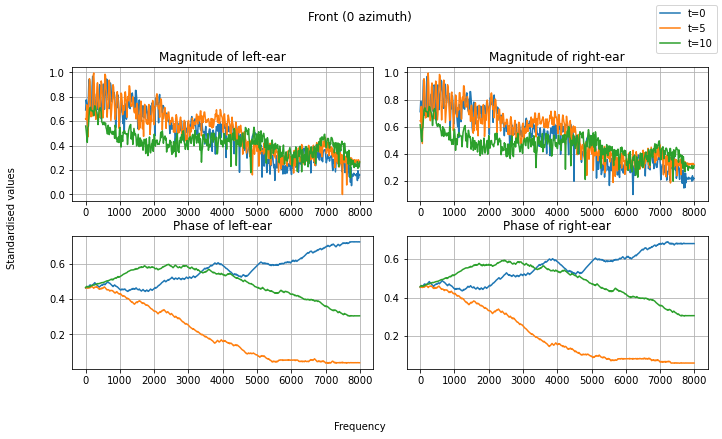

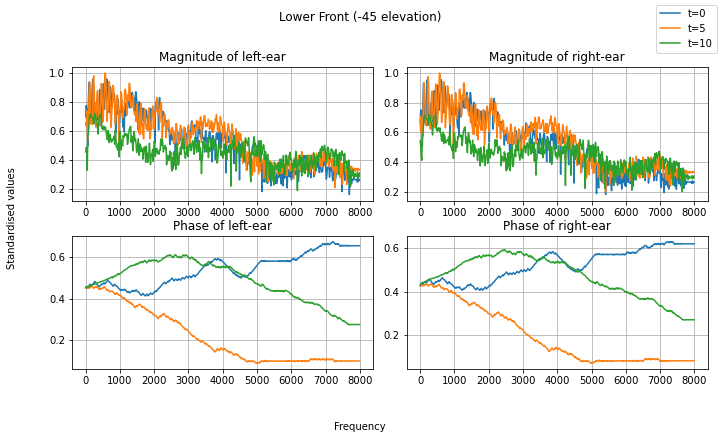

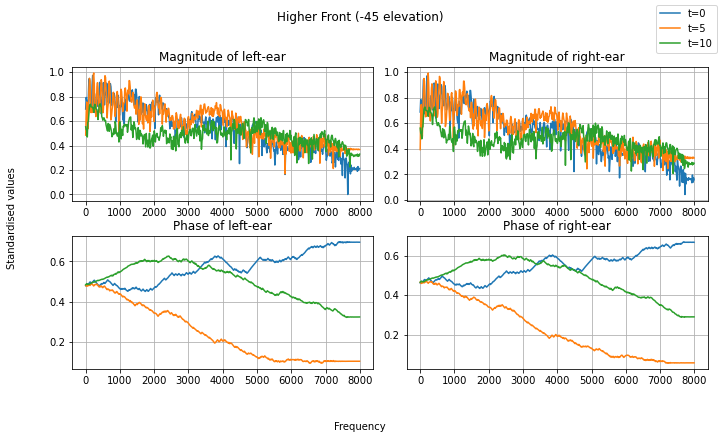

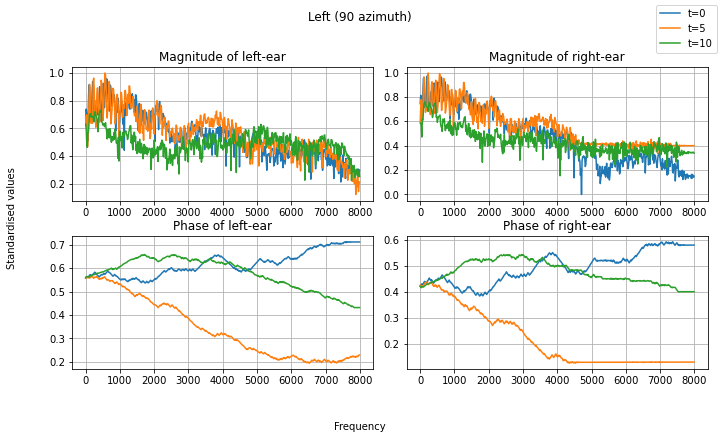

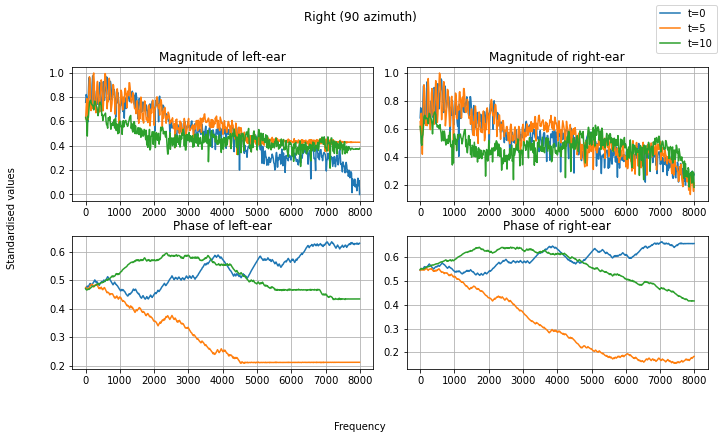

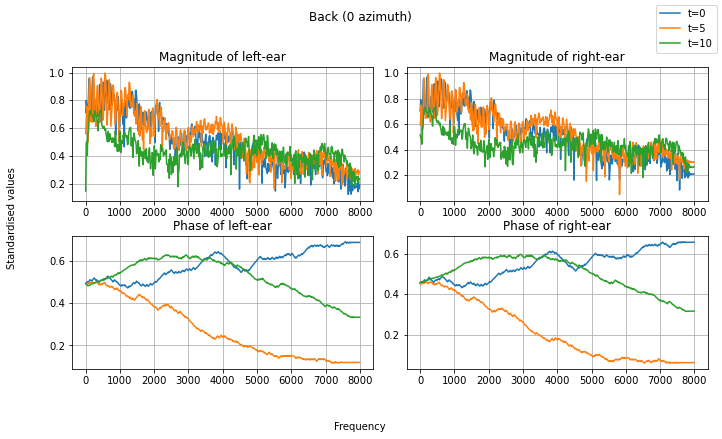

In [32]:
sig_sliced = speech_male(idx=1)
# 72, 0, 144, 78, 90
plot_list = [72, 0, 144, 78, 90, 84]
title_list = ["Front (0 azimuth)", "Lower Front (-45 elevation)", "Higher Front (-45 elevation)", "Left (90 azimuth)", "Right (90 azimuth)", "Back (0 azimuth)"]

for idx in range(len(plot_list)):

    sigL, sigR = binaural_sig(sig_sliced, loc_idx=plot_list[idx])
    magL, phaseL, magR, phaseR = binaural_cues(sigL, sigR)
    vis_cues = dl.VisualiseCues(speech_male.fs_audio, binaural_cues.freq_axis, binaural_cues.time_axis)

    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    # fig = fig.subplots_adjust(hspace=.5, wspace=2)
    # f, ax = plt.subplots(figsize=(6,4))
    ax1 = vis_cues.showCues(ax1, magL, figTitle="Magnitude of left-ear")
    ax2 = vis_cues.showCues(ax2, magR, figTitle="Magnitude of right-ear")
    ax3 = vis_cues.showCues(ax3, phaseL, figTitle="Phase of left-ear")
    ax4 = vis_cues.showCues(ax4, phaseR, figTitle="Phase of right-ear")
    handles, labels = ax4.get_legend_handles_labels()
    fig.legend(handles, labels, loc='best')
    
    fig.text(0.01, 0.5, 'Standardised values', va='center', rotation='vertical')
    fig.text(0.5, 0.01, 'Frequency', ha='center')
    plt.suptitle(title_list[idx])
    fig.tight_layout()
    plt.subplots_adjust(top=0.85,left=0.1,bottom=0.15)
    plt.show()
    # raise SystemExit